# Libraries

In [1]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm




In [28]:
install.packages("beeswarm")
library(beeswarm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("lawstat")
library(lawstat)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Kendall’, ‘mvtnorm’, ‘Rdpack’




In [12]:
# Load the car package for the leveneTest function
install.packages("car")
library(car)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



# Read Data

In [1]:
Por <- read.table("student-por.csv", sep = ";", header = TRUE)
Math <- read.table("student-mat.csv", sep = ";", header = TRUE)

In [2]:
head(Por)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [3]:
head(Math)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


# Explanatory analysis

Summary statistics

In [10]:
# Summary statistics for traveltime in the Portuguese dataset
summary(Por$traveltime)

# Summary statistics for studytime in the Portuguese dataset
summary(Por$studytime)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.569   2.000   4.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.931   2.000   4.000 

For "traveltime":

Min.: The minimum value observed in the "traveltime" variable is 1.000. This means that the shortest travel time recorded in the dataset is 1 (indicating less than 15 minutes of travel time).

1st Qu.: The 1st quartile (25th percentile) is 1.000. This value represents the data point below which 25% of the data falls, indicating that a quarter of the students have a travel time less than or equal to 1.

Median: The median is 1.000. It represents the middle value in the dataset when the values are sorted in ascending order. In this case, it's also 1, which means half of the students have a travel time of 1 or less.

Mean: The mean (average) travel time is 1.569. On average, students have a travel time of approximately 1.569 units, which is slightly more than 1.

3rd Qu.: The 3rd quartile (75th percentile) is 2.000. This value represents the data point below which 75% of the data falls, indicating that three-quarters of the students have a travel time less than or equal to 2.

Max.: The maximum value observed in the "traveltime" variable is 4.000. This means that the longest travel time recorded in the dataset is 4 (indicating more than 1 hour of travel time).

In [11]:
# Summary statistics for traveltime in the Math dataset
summary(Math$traveltime)

# Summary statistics for studytime in the Math dataset
summary(Math$studytime)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.448   2.000   4.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.035   2.000   4.000 

In [12]:
# summary(Por)

In [13]:
# summary(Math)

In [14]:
# creating a function to count records
count_records_by_school <- function(data) {
  school_counts <- table(data$school)
  return(school_counts)
}


school_counts <- count_records_by_school(Math)
print(school_counts)



 GP  MS 
349  46 


In [15]:
# applying function one more time
school_counts <- count_records_by_school(Por)
print(school_counts)


 GP  MS 
423 226 


Data visualization

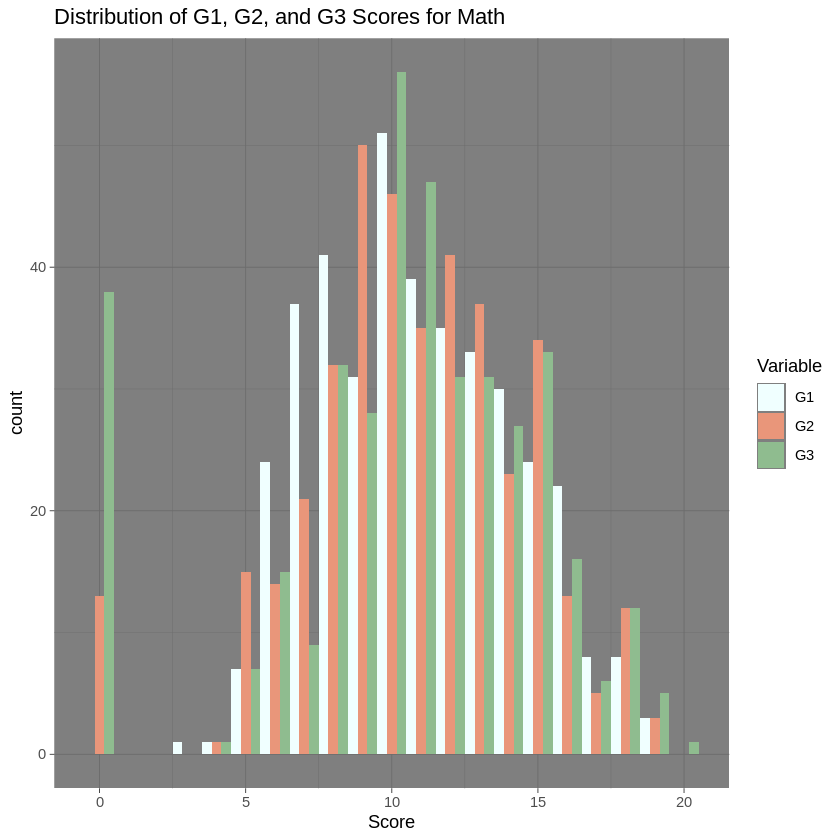

In [16]:

# Create a data frame containing G1, G2, and G3
data_df <- data.frame(
  Variable = rep(c("G1", "G2", "G3"), each = length(Math$G1)),
  Value = c(Math$G1, Math$G2, Math$G3)
)

# Create a paired histogram
paired_histogram <- ggplot(data_df, aes(x = Value, fill = Variable)) +
  geom_histogram(binwidth = 1, position = "dodge") +
  labs(title = "Distribution of G1, G2, and G3 Scores for Math", x = "Score") +
  scale_fill_manual(values = c("G1" = "azure", "G2" = "darksalmon", "G3" = "darkseagreen")) +
  theme_dark()


print(paired_histogram)


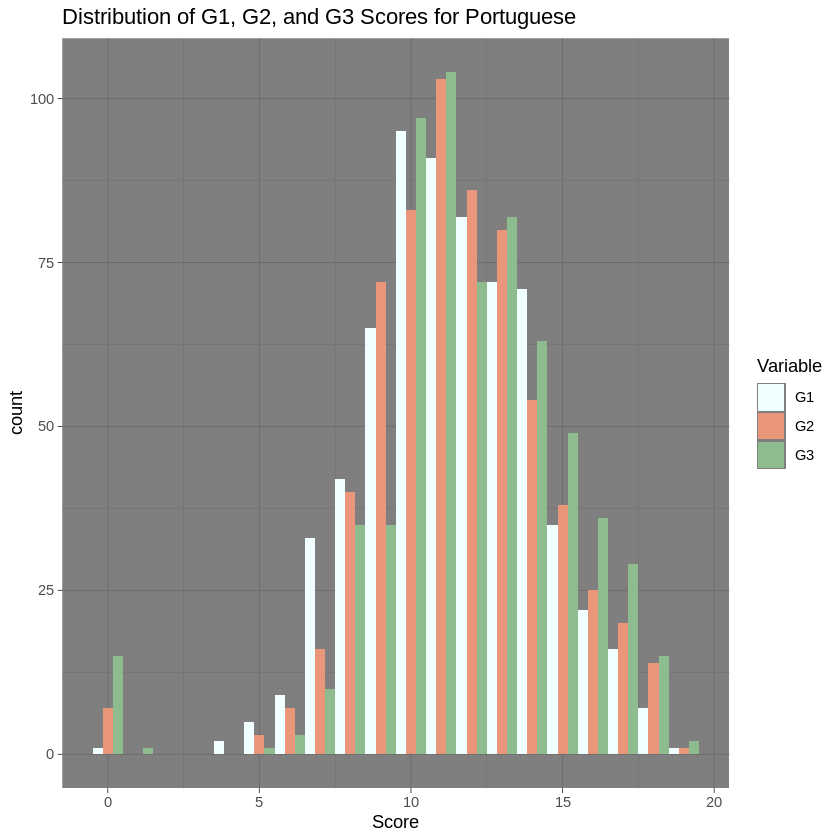

In [17]:
# Create a data frame containing G1, G2, and G3
data_df <- data.frame(
  Variable = rep(c("G1", "G2", "G3"), each = length(Por$G1)),
  Value = c(Por$G1, Por$G2, Por$G3)
)

# Create a paired histogram
paired_histogram <- ggplot(data_df, aes(x = Value, fill = Variable)) +
  geom_histogram(binwidth = 1, position = "dodge") +
  labs(title = "Distribution of G1, G2, and G3 Scores for Portuguese ", x = "Score") +
  scale_fill_manual(values = c("G1" = "azure", "G2" = "darksalmon", "G3" = "darkseagreen")) +
  theme_dark()


print(paired_histogram)


In [18]:
#  scatter plot for study time vs. final grade (G3)
# plot(Math$studytime, Math$G3, main = "Scatter Plot of Study Time(Math) vs. G3", xlab = "Study Time", ylab = "G3")


In [19]:
# scatter plot for travel time vs. final grade (G3)
# plot(Math$traveltime, Math$G3, main = "Scatter Plot of Study Time(Math) vs. G3", xlab = "Study Time", ylab = "G3")


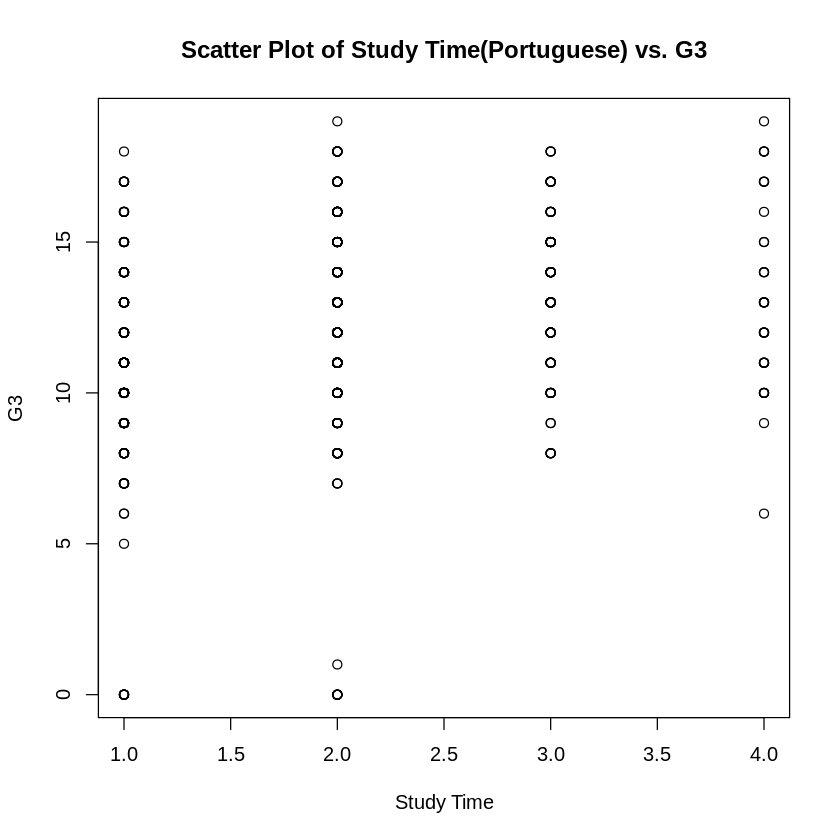

In [20]:
# scatter plot for study time vs. final grade (G3)
plot(Por$studytime, Por$G3, main = "Scatter Plot of Study Time(Portuguese) vs. G3", xlab = "Study Time", ylab = "G3")


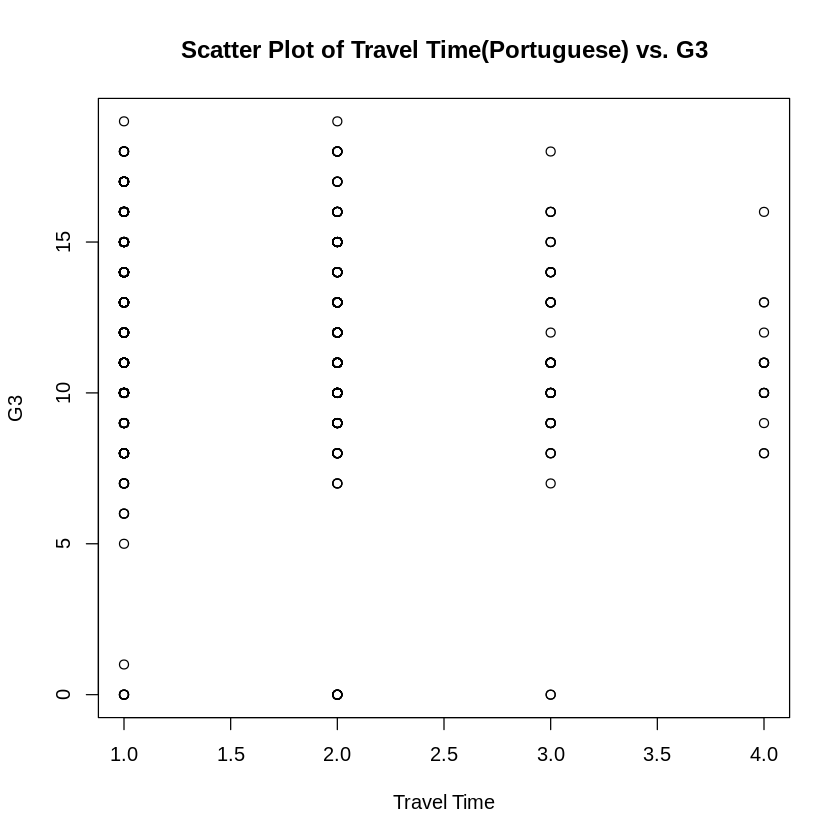

In [64]:
# scatter plot for study time vs. final grade (G3)
plot(Por$traveltime, Por$G3, main = "Scatter Plot of Travel Time(Portuguese) vs. G3", xlab = "Travel Time", ylab = "G3")


# 1 Sample Test

In [22]:
# Shapiro-Wilk test for normality of Por Study time
shapiro_test_result <- shapiro.test(Por$studytime)
print(shapiro_test_result)



	Shapiro-Wilk normality test

data:  Por$studytime
W = 0.82508, p-value < 2.2e-16



In [35]:
symmetry.test(Por$studytime)


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Por$studytime
Test statistic = -3.1944, p-value = 0.01
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                178 


In [31]:
# wilcox.test(Por$studytime, mu = 3, alternative = 'less')


	Wilcoxon signed rank test with continuity correction

data:  Por$studytime
V = 5967.5, p-value < 2.2e-16
alternative hypothesis: true location is less than 3


In [34]:
oneSamplePermutationTest(Por$studytime, mu = 3, alternative = 'less')


Results of Hypothesis Test
--------------------------

Null Hypothesis:                 Mean (Median) = 3

Alternative Hypothesis:          True Mean (Median) is less than 3

Test Name:                       One-Sample Permutation Test
                                 (Based on Sampling
                                 Permutation Distribution
                                 5000 Times)

Estimated Parameter(s):          Mean = 1.930663

Data:                            Por$studytime

Sample Size:                     649

Test Statistic:                  Sum(x - 3) = -694

P-value:                         0


so the mean study time is less than recommended

Now let's make some proportion test

In [26]:
# Number of successes (students interested in higher education)
successes <- sum(Por$higher == "yes")

# Total number of trials (total number of students)
total_trials <- length(Por$higher)


In [27]:
# We can do the test
binom.test(successes, total_trials, p=0.75, alternative = 'less')




	Exact binomial test

data:  successes and total_trials
number of successes = 580, number of trials = 649, p-value = 1
alternative hypothesis: true probability of success is less than 0.75
95 percent confidence interval:
 0.0000000 0.9129935
sample estimates:
probability of success 
             0.8936826 


In [28]:
# we can also use the approximation
prop.test(successes, total_trials, p=0.75, , alternative = 'less')


	1-sample proportions test with continuity correction

data:  successes out of total_trials, null probability 0.75
X-squared = 70.694, df = 1, p-value = 1
alternative hypothesis: true p is less than 0.75
95 percent confidence interval:
 0.0000000 0.9126802
sample estimates:
        p 
0.8936826 


# 2 Samples test

firstly, i'd like to compare study time of students from two different schools.

- We can definitely say that these datasets are independent
- therefore, we need to check normality of both

In [29]:
# Shapiro-Wilk test for normality
shapiro_test_GP <- shapiro.test(Por$studytime[ Por$school == "GP" ])
shapiro_test_MS <- shapiro.test(Por$studytime[ Por$school == "MS" ])

print(shapiro_test_GP)
print(shapiro_test_MS)



	Shapiro-Wilk normality test

data:  Por$studytime[Por$school == "GP"]
W = 0.83567, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  Por$studytime[Por$school == "MS"]
W = 0.79535, p-value < 2.2e-16



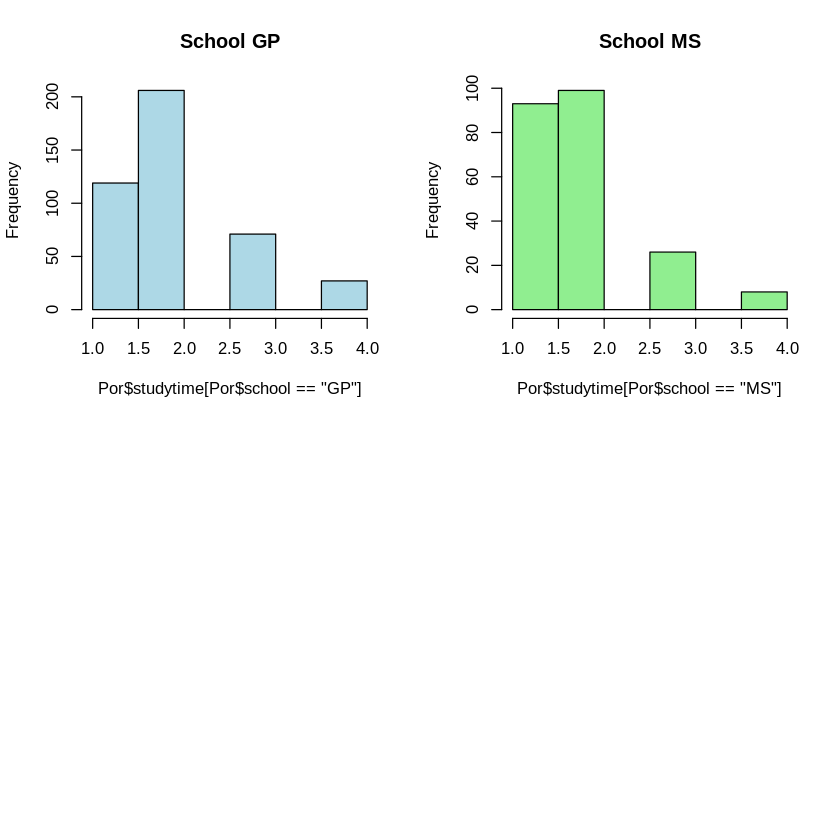

In [32]:
# Visual inspection of the study time distribution for each school
par(mfrow = c(2, 2))

# Histograms
hist(Por$studytime[ Por$school == "GP" ], main = "School GP", col = "lightblue", xlim = c(1, 4))
hist(Por$studytime[ Por$school == "MS" ], main = "School MS", col = "lightgreen", xlim = c(1, 4))




since it is not normal, we are about to check symmetry of each

In [33]:
symmetry.test(Por$studytime[ Por$school == "GP" ])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Por$studytime[Por$school == "GP"]
Test statistic = 0.53411, p-value = 0.688
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 72 


In [34]:
symmetry.test(Por$studytime[ Por$school == "MS" ])


	m-out-of-n bootstrap symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Por$studytime[Por$school == "MS"]
Test statistic = -5.9978, p-value = 0.002
alternative hypothesis: the distribution is asymmetric.
sample estimates:
bootstrap optimal m 
                 43 


i cannot run perm.t.test, so i will use Wilcoxon test

http://www.sthda.com/english/wiki/unpaired-two-samples-wilcoxon-test-in-r

In [35]:
wilcoxon_test_result <- wilcox.test(studytime ~ school, data = Por,   exact = FALSE)
print(wilcoxon_test_result)



	Wilcoxon rank sum test with continuity correction

data:  studytime by school
W = 55438, p-value = 0.0002901
alternative hypothesis: true location shift is not equal to 0



From here, we know that we have different number of records for two schools, and it differs significantly, so instead of comparing two schools, i'd compare groups with different travel time by grades

In [45]:
# we have grades from 0 to 20, so i will define a good grade to be greater than 14, meaning it is 15+, like an upper quartile
threshold_grade <- 14
Por$good_grade <- ifelse(Por$G3 > threshold_grade, 1, 0)


In [46]:
Por$good_grade

[1] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 [38] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
[112] 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[186] 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1
[223] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
[260] 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[297] 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
[334] 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
[371] 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0
[408] 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[445] 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1
[519] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
[556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0
[630] 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0

In [51]:
# Create a binary indicator for small travel time
threshold_travel <- 3
Por$small_travel_time <- ifelse(Por$traveltime <= threshold_travel, 1, 0)
Por$small_travel_time

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[445] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[482] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[519] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[593] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[630] 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [52]:
# Proportion test
prop_test_good_grades <- prop.test(table(Por$good_grade, Por$small_travel_time))
print(prop_test_good_grades)


Warning message in prop.test(table(Por$good_grade, Por$small_travel_time)):
“Chi-squared approximation may be incorrect”



	2-sample test for equality of proportions with continuity correction

data:  table(Por$good_grade, Por$small_travel_time)
X-squared = 1.1899, df = 1, p-value = 0.2754
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.004210652  0.046858535
sample estimates:
     prop 1      prop 2 
0.028957529 0.007633588 



Null Hypothesis (H0): The proportion of good grades is the same between groups with small and long travel times.

Alternative Hypothesis (H1): There is a significant difference in the proportion of good grades between groups with small and long travel times.

Since the p-value is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis.

# 3+ Samples

In [52]:
# Create a subset of Por with records where school is 'GP'
Por_GP <- subset(Por, school == 'GP')


In [55]:
head(Por_GP)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,goout,Dalc,Walc,health,absences,G1,G2,G3,good_grade,small_travel_time
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,1,1,3,4,0,11,11,0,1
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,3,1,1,3,2,9,11,11,0,1
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,2,2,3,3,6,12,13,12,0,1
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,2,1,1,5,0,14,14,14,0,1
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,2,1,2,5,0,11,13,13,0,1
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,2,1,2,5,6,12,12,13,0,1


In [63]:
# summary(Por_GP)

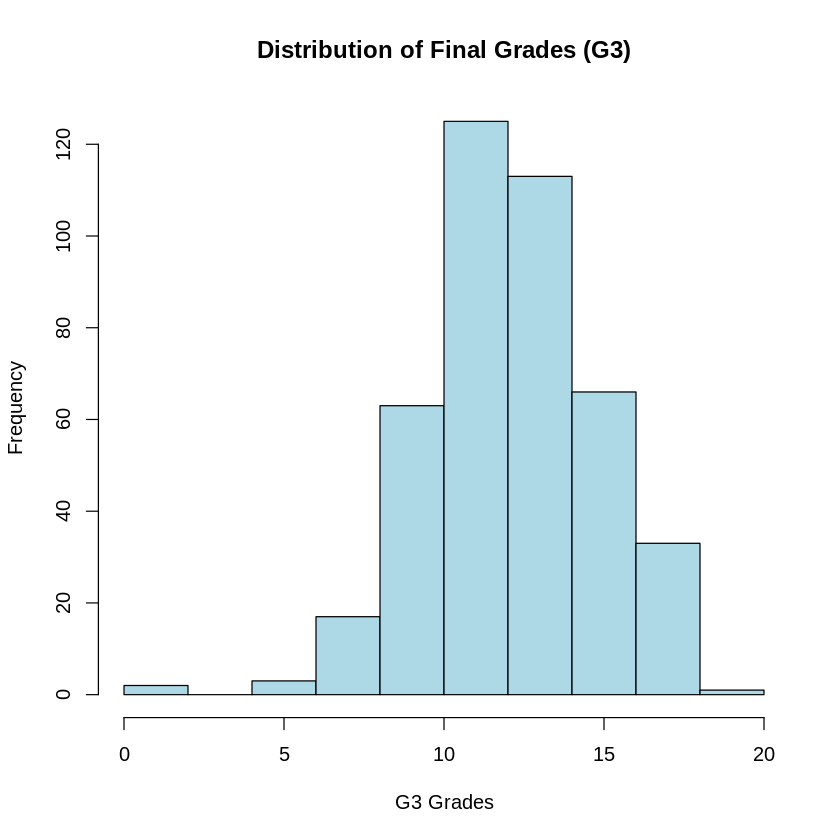

In [57]:
# Histogram for the distribution of G3
hist(Por_GP$G3, main = "Distribution of Final Grades (G3)", xlab = "G3 Grades", col = "lightblue", border = "black")


In [58]:
# Calculate quartiles for G3
quartiles_G3 <- quantile(Por_GP$G3, c(0, 0.25, 0.5, 0.75, 1))

# Display quartile values
print(quartiles_G3)


  0%  25%  50%  75% 100% 
   0   11   13   14   19 


low: 0-9

satisfactory: 10 - 12

good: 13-16

excellent: 17-20

In [6]:
Por_GP$G3_groups <- cut(Por_GP$G3, breaks = c(-Inf, 9, 12, 16, 20), labels = c("low", "satisfactory", "good", "excellent"), include.lowest = TRUE)


In [7]:
# Print the relevant columns
print(head(Por_GP[, c("G3", "G3_groups")]))


  G3    G3_groups
1 11 satisfactory
2 11 satisfactory
3 12 satisfactory
4 14         good
5 13         good
6 13         good


In [8]:
# Print the relevant columns
print(tail(Por_GP[, c("G3", "G3_groups")]))


    G3    G3_groups
418 17    excellent
419 14         good
420 11 satisfactory
421 17    excellent
422 10 satisfactory
423 13         good


In [62]:
# Shapiro-Wilk test for normality within each group
shapiro_test_low <- shapiro.test(Por_GP$goout[Por_GP$G3_groups == "low"])
shapiro_test_satisfactory <- shapiro.test(Por_GP$goout[Por_GP$G3_groups == "satisfactory"])
shapiro_test_good <- shapiro.test(Por_GP$goout[Por_GP$G3_groups == "good"])
shapiro_test_excellent <- shapiro.test(Por_GP$goout[Por_GP$G3_groups == "excellent"])

# Print the results
print(shapiro_test_low)
print(shapiro_test_satisfactory)
print(shapiro_test_good)
print(shapiro_test_excellent)


	Shapiro-Wilk normality test

data:  Por_GP$goout[Por_GP$G3_groups == "low"]
W = 0.8306, p-value = 0.0001621


	Shapiro-Wilk normality test

data:  Por_GP$goout[Por_GP$G3_groups == "satisfactory"]
W = 0.9129, p-value = 8.796e-09


	Shapiro-Wilk normality test

data:  Por_GP$goout[Por_GP$G3_groups == "good"]
W = 0.91138, p-value = 6.486e-09


	Shapiro-Wilk normality test

data:  Por_GP$goout[Por_GP$G3_groups == "excellent"]
W = 0.80168, p-value = 2.763e-05



http://www.sthda.com/english/wiki/kruskal-wallis-test-in-r

In [65]:
# Kruskal-Wallis test for goout across G3 groups
kruskal_test_result <- kruskal.test(goout ~ G3_groups, data = Por_GP)

# Print the results
print(kruskal_test_result)



	Kruskal-Wallis rank sum test

data:  goout by G3_groups
Kruskal-Wallis chi-squared = 9.3342, df = 3, p-value = 0.02516



We can reject $H_0$ that mean of goout is the same, meaning, that it will affect the final grade. So i'd like to include that variable later in my more advanced regression model.

Now i want to see if we have different variances of failures in different groups of absences. I have feeling that absence will improve my advanced regression model, so by checking variances i can justify it's impact on grades.

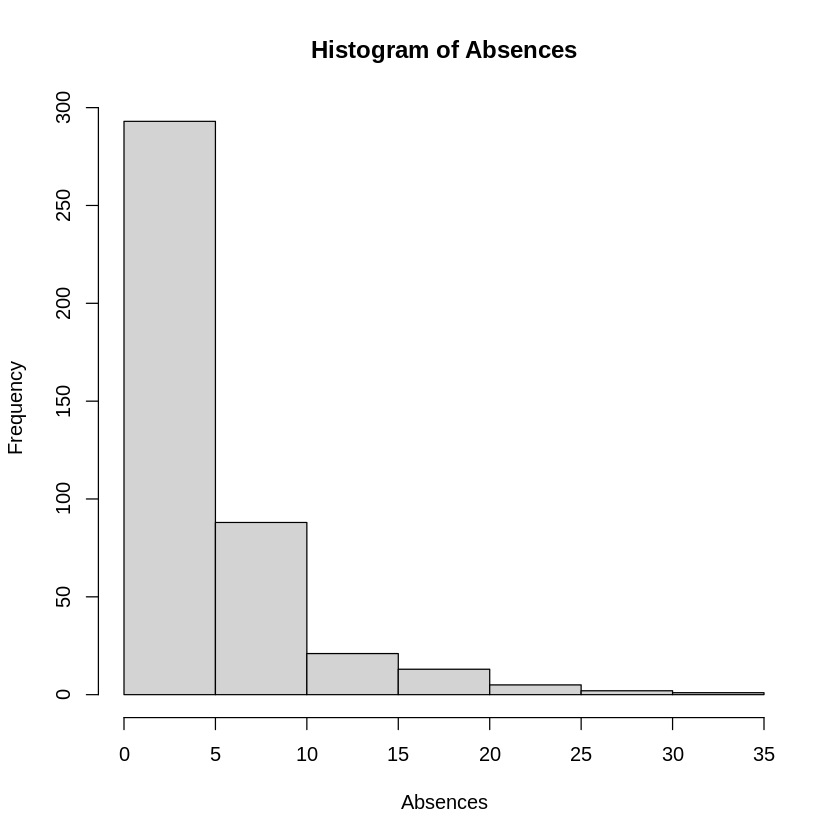

In [9]:
# Create a histogram for the distribution of absences
hist(Por_GP$absences, main = "Histogram of Absences", xlab = "Absences")


In [10]:
# Calculate quartiles for G3
quartiles_Absc <- quantile(Por_GP$absences, c(0, 0.25, 0.5, 0.75, 1))

# Display quartile values
print(quartiles_Absc)

  0%  25%  50%  75% 100% 
   0    0    2    6   32 


low: 0-2

medium: 3-4

high: 4+

In [13]:
# Create a factor variable based on the new groups
Por_GP$absences_groups <- cut(Por_GP$absences, breaks = c(-Inf, 2, 4, Inf), labels = c("Low", "Medium", "High"), include.lowest = TRUE)

# Perform Levene's test
levene_test_result <- leveneTest(Por_GP$failures ~ Por_GP$absences_groups)

# Print the results
print(levene_test_result)

Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   2  4.1494 0.01642 *
      420                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Regression

TRY

In [53]:
# Create a base linear model
base_model <- lm(G3 ~ traveltime + studytime, data = Por_GP)

# Summarize the model
summary(base_model)



Call:
lm(formula = G3 ~ traveltime + studytime, data = Por_GP)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9792  -1.7557   0.0208   1.6857   6.0208 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.6441     0.4193  27.772  < 2e-16 ***
traveltime   -0.4414     0.1748  -2.525   0.0119 *  
studytime     0.7765     0.1466   5.295 1.92e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.524 on 420 degrees of freedom
Multiple R-squared:  0.08017,	Adjusted R-squared:  0.07579 
F-statistic:  18.3 on 2 and 420 DF,  p-value: 2.392e-08


In [54]:
# Create a base2 linear model
model_2 <- lm(G3 ~ traveltime + studytime +  absences, data = Por_GP)

# Summarize the model
summary(model_2)



Call:
lm(formula = G3 ~ traveltime + studytime + absences, data = Por_GP)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3883  -1.6938  -0.0822   1.7182   6.4239 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.10890    0.43665  27.731  < 2e-16 ***
traveltime  -0.41446    0.17287  -2.397 0.016945 *  
studytime    0.69388    0.14695   4.722 3.19e-06 ***
absences    -0.07992    0.02375  -3.365 0.000837 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.494 on 419 degrees of freedom
Multiple R-squared:  0.1044,	Adjusted R-squared:  0.09795 
F-statistic: 16.27 on 3 and 419 DF,  p-value: 5.049e-10


In [55]:
# Create a base3 linear model
model_3 <- lm(G3 ~ traveltime + studytime +  absences + goout , data = Por_GP)

# Summarize the model
summary(model_3)



Call:
lm(formula = G3 ~ traveltime + studytime + absences + goout, 
    data = Por_GP)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9358  -1.6693  -0.0927   1.6670   6.5124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.84893    0.54250  23.685  < 2e-16 ***
traveltime  -0.38838    0.17240  -2.253   0.0248 *  
studytime    0.67646    0.14642   4.620 5.12e-06 ***
absences    -0.07667    0.02368  -3.238   0.0013 ** 
goout       -0.24025    0.10546  -2.278   0.0232 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.481 on 418 degrees of freedom
Multiple R-squared:  0.1153,	Adjusted R-squared:  0.1069 
F-statistic: 13.63 on 4 and 418 DF,  p-value: 1.885e-10


In [56]:
# Create a base linear model
model_MAX <- lm(G3 ~ traveltime + studytime + absences + age + failures + goout, data = Por_GP)

# Summarize the model
summary(model_MAX)



Call:
lm(formula = G3 ~ traveltime + studytime + absences + age + failures + 
    goout, data = Por_GP)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8960 -1.5706 -0.1676  1.4850  7.2907 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.87209    1.60719   5.520 5.97e-08 ***
traveltime  -0.29491    0.16149  -1.826 0.068536 .  
studytime    0.46469    0.13942   3.333 0.000936 ***
absences    -0.06481    0.02259  -2.869 0.004329 ** 
age          0.27209    0.09706   2.803 0.005296 ** 
failures    -1.73884    0.21986  -7.909 2.36e-14 ***
goout       -0.24503    0.09960  -2.460 0.014292 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.318 on 416 degrees of freedom
Multiple R-squared:  0.2317,	Adjusted R-squared:  0.2206 
F-statistic: 20.91 on 6 and 416 DF,  p-value: < 2.2e-16


In [51]:
# Create a base linear model
model_G1 <- lm(G3 ~ G1, data = Por_GP)

# Summarize the model
summary(model_G1)



Call:
lm(formula = G3 ~ G1, data = Por_GP)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7182  -0.8473   0.0237   0.7979   8.8624 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.13764    0.38630   5.534 5.52e-08 ***
G1           0.87096    0.03159  27.567  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.57 on 421 degrees of freedom
Multiple R-squared:  0.6435,	Adjusted R-squared:  0.6427 
F-statistic: 759.9 on 1 and 421 DF,  p-value: < 2.2e-16


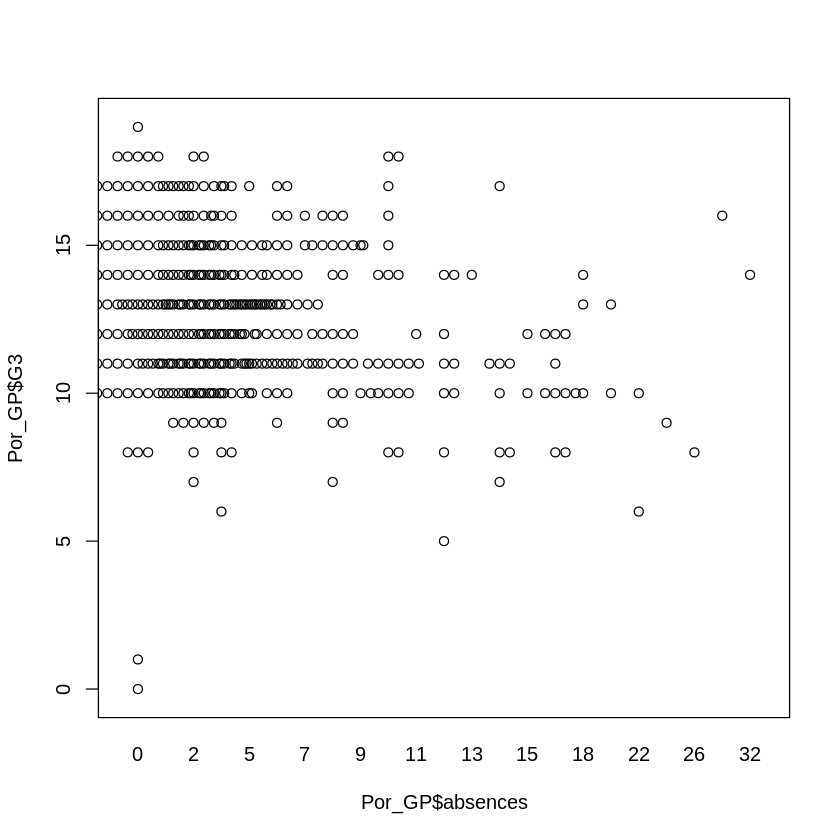

In [29]:
beeswarm(Por_GP$G3 ~ Por_GP$absences)

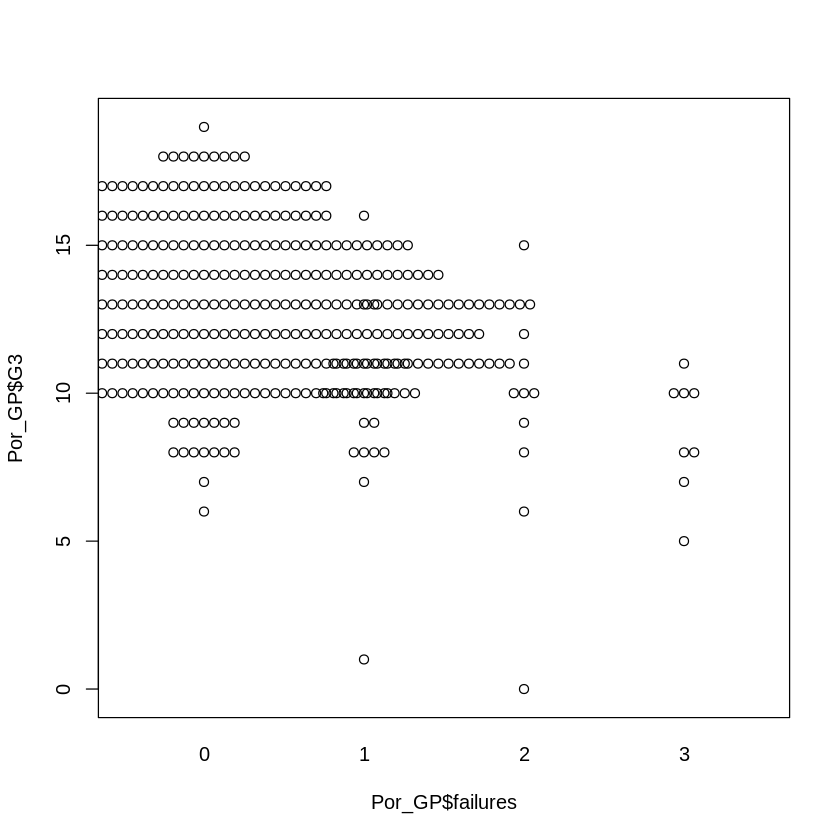

In [45]:
beeswarm(Por_GP$G3 ~ Por_GP$failures)

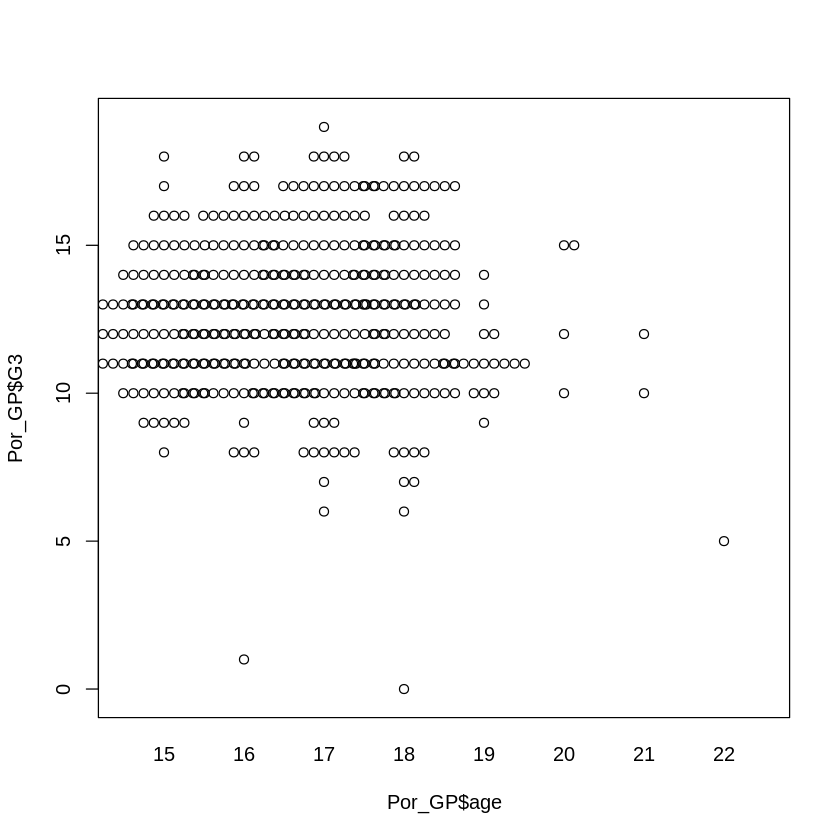

In [50]:
beeswarm(Por_GP$G3 ~ Por_GP$age)

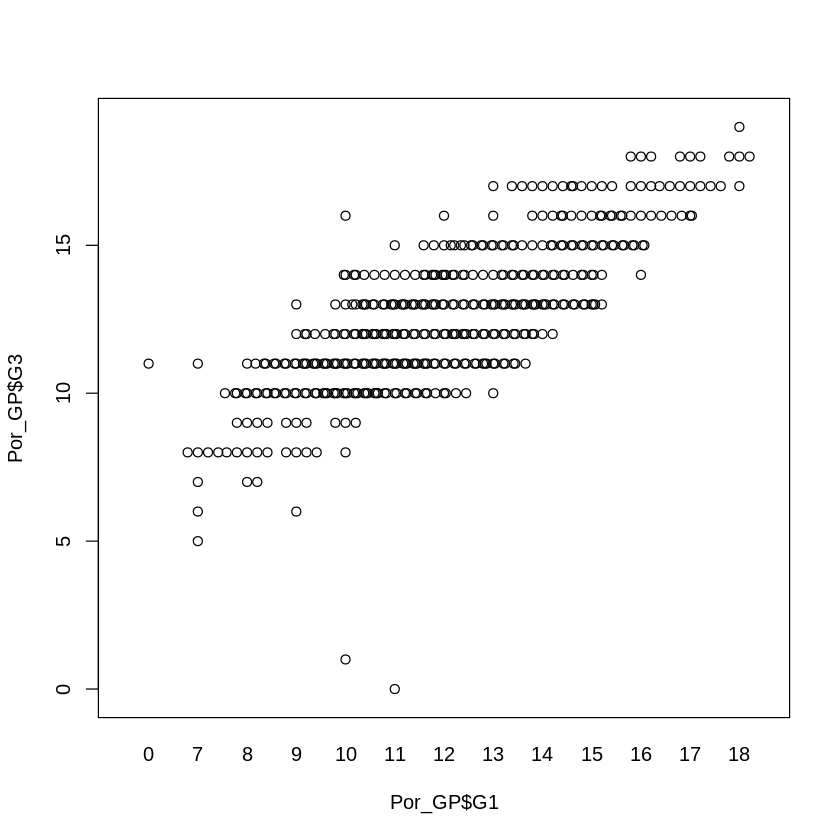

In [31]:
beeswarm(Por_GP$G3 ~ Por_GP$G1)

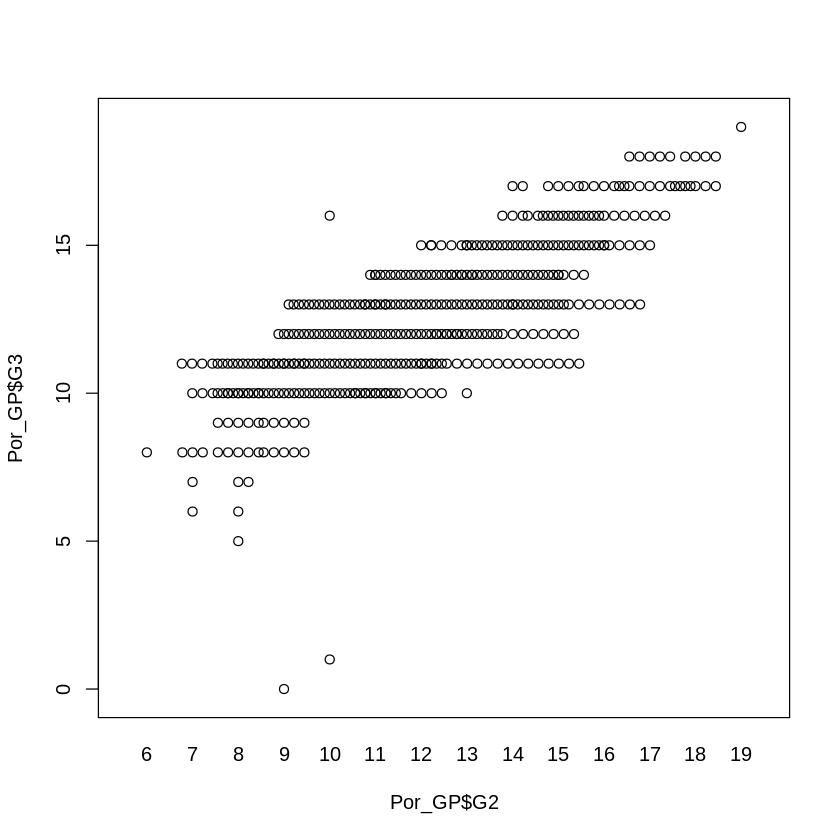

In [32]:
beeswarm(Por_GP$G3 ~ Por_GP$G2)

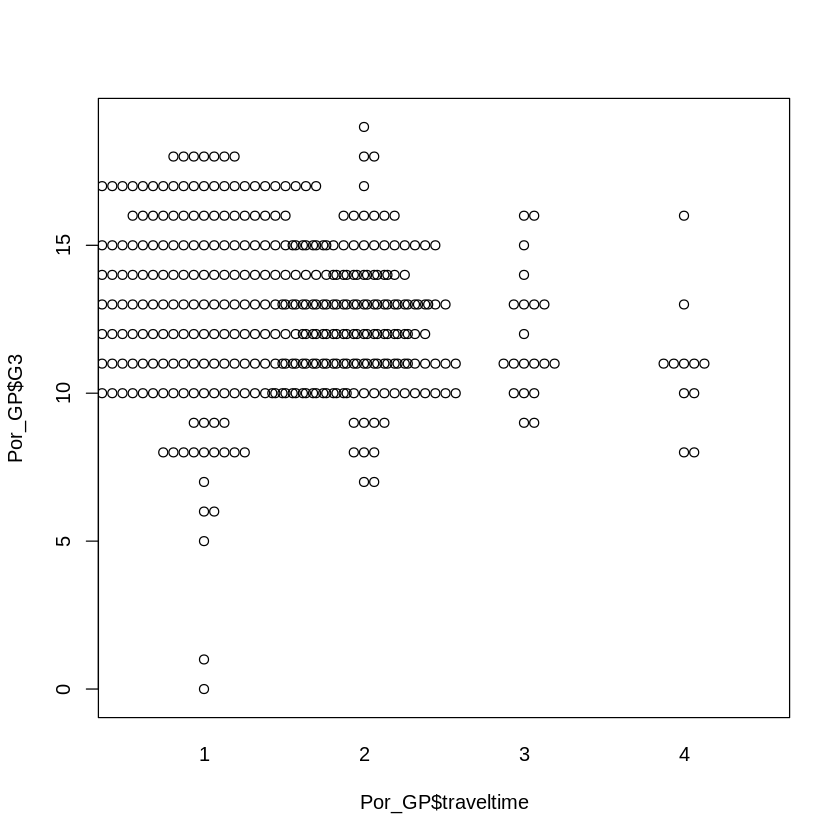

In [33]:
beeswarm(Por_GP$G3 ~ Por_GP$traveltime)

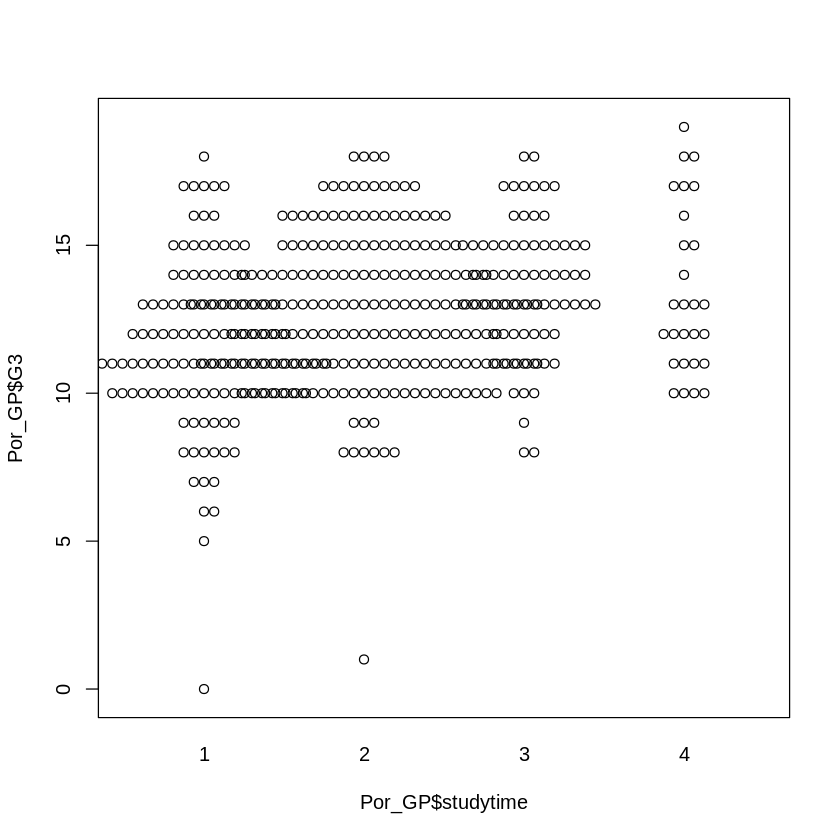

In [34]:
beeswarm(Por_GP$G3 ~ Por_GP$studytime)

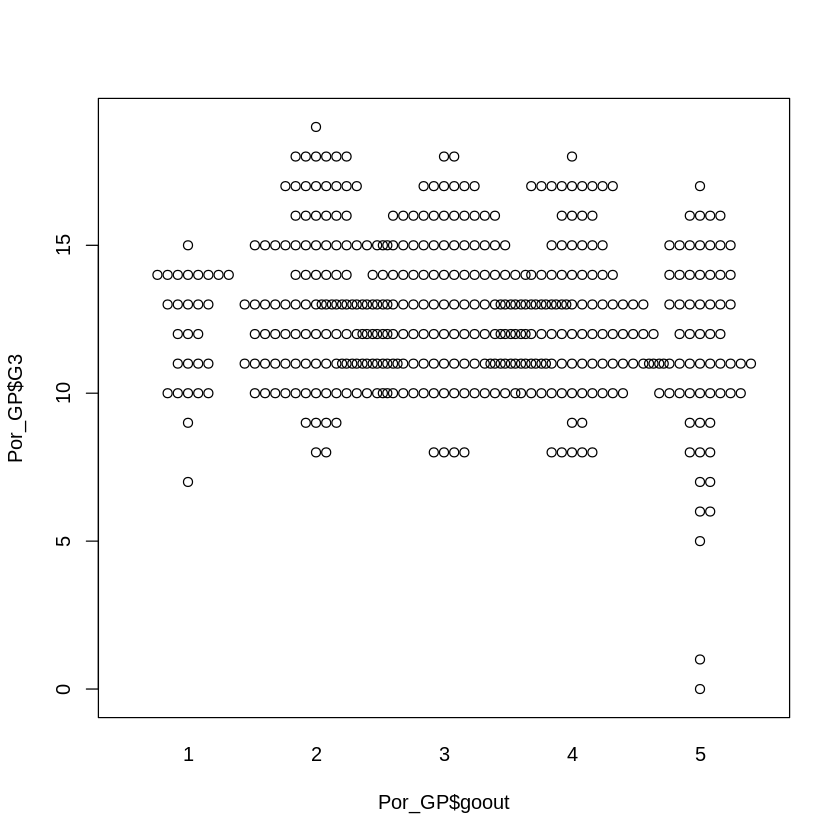

In [35]:
beeswarm(Por_GP$G3 ~ Por_GP$goout)

# GLM

i will try really simple thing without special techniques. I will transform grades into categories . So my model will try to predict a category of the grade but not the exact one

In [ ]:
# Define categories
grade_categories <- cut(Por$G3, breaks = c(-Inf, 10, 15, Inf), labels = c("Low", "Medium", "High"), include.lowest = TRUE)

# Convert categories to a factor
grade_categories <- as.factor(grade_categories)

# Create a generalized linear model (GLM)
glm_model <- glm(grade_categories ~ traveltime + studytime + absences + failures + age, data = Por, family = "binomial")

# Summarize the GLM
summary(glm_model)



Call:
glm(formula = grade_categories ~ traveltime + studytime + absences + 
    failures + age, family = "binomial", data = Por)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.51597    1.45072   1.045 0.296035    
traveltime  -0.25077    0.12503  -2.006 0.044887 *  
studytime    0.42315    0.12708   3.330 0.000869 ***
absences    -0.04143    0.02052  -2.019 0.043493 *  
failures    -1.87689    0.25315  -7.414 1.22e-13 ***
age         -0.02993    0.08659  -0.346 0.729575    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.76  on 648  degrees of freedom
Residual deviance: 649.48  on 643  degrees of freedom
AIC: 661.48

Number of Fisher Scoring iterations: 5


In [ ]:
# Define categories
grade_categories <- cut(Por$G3, breaks = c(-Inf, 10, 15, Inf), labels = c(1, 2, 3), include.lowest = TRUE)

# Convert categories to a factor
grade_categories <- as.factor(grade_categories)

# Create a generalized linear model (GLM)
glm_model <- glm(grade_categories ~ traveltime + studytime + absences + failures + age, data = Por, family = "binomial")

# Summarize the GLM
summary(glm_model)



Call:
glm(formula = grade_categories ~ traveltime + studytime + absences + 
    failures + age, family = "binomial", data = Por)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.51597    1.45072   1.045 0.296035    
traveltime  -0.25077    0.12503  -2.006 0.044887 *  
studytime    0.42315    0.12708   3.330 0.000869 ***
absences    -0.04143    0.02052  -2.019 0.043493 *  
failures    -1.87689    0.25315  -7.414 1.22e-13 ***
age         -0.02993    0.08659  -0.346 0.729575    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.76  on 648  degrees of freedom
Residual deviance: 649.48  on 643  degrees of freedom
AIC: 661.48

Number of Fisher Scoring iterations: 5


In [ ]:
# Define categories
pass_fail_categories <- cut(Por$G3, breaks = c(-Inf, 10, 20), labels = c("Fail", "Pass"), include.lowest = TRUE)

# Convert categories to a factor
pass_fail_categories <- as.factor(pass_fail_categories)

# Create a generalized linear model (GLM)
glm_model <- glm(pass_fail_categories ~ traveltime + studytime + age + absences + failures + goout, data = Por, family = "binomial")

# Summarize the GLM
summary(glm_model)



Call:
glm(formula = pass_fail_categories ~ traveltime + studytime + 
    age + absences + failures + goout, family = "binomial", data = Por)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.62817    1.45902   1.116  0.26445    
traveltime  -0.24274    0.12544  -1.935  0.05297 .  
studytime    0.41709    0.12729   3.277  0.00105 ** 
age         -0.02282    0.08709  -0.262  0.79327    
absences    -0.04025    0.02056  -1.958  0.05026 .  
failures    -1.88648    0.25470  -7.407 1.29e-13 ***
goout       -0.07344    0.08273  -0.888  0.37469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.76  on 648  degrees of freedom
Residual deviance: 648.70  on 642  degrees of freedom
AIC: 662.7

Number of Fisher Scoring iterations: 5


In [ ]:
# Deviance
deviance_value <- deviance(glm_model)
print(paste("Deviance:", deviance_value))

# Deviance residuals
deviance_residuals <- residuals(glm_model, type = "deviance")


[1] "Deviance: 762.863490826025"


In [ ]:

# to test individual effects:
drop1(glm_model, test="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,649.4846,661.4846,NA,NA
traveltime,1,653.4152,663.4152,3.9305662,4.741598e-02
studytime,1,661.3104,671.3104,11.8258168,5.841508e-04
absences,1,653.5142,663.5142,4.0296044,4.470842e-02
failures,1,738.8433,748.8433,89.3587412,3.293338e-21
age,1,649.6040,659.6040,0.1194473,7.296347e-01
